## Wildfire data from sqlite database

In [26]:
import sqlite3
import pandas as pd

# Create the connection
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT * FROM Fires", cnx)

In [27]:
pd.set_option('display.max_columns', 100)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [28]:
df.shape

(1880465, 39)

In [47]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

In [29]:
df_small = df[["FIRE_NAME", "FIRE_YEAR", "DISCOVERY_DOY", "STAT_CAUSE_DESCR", "FIRE_SIZE", "LATITUDE", "LONGITUDE"]]
df_small = df_small[df_small["FIRE_YEAR"] > 2001]
df_small.shape

(1125314, 7)

In [30]:
df_small.isnull().sum()

FIRE_NAME           518031
FIRE_YEAR                0
DISCOVERY_DOY            0
STAT_CAUSE_DESCR         0
FIRE_SIZE                0
LATITUDE                 0
LONGITUDE                0
dtype: int64

In [31]:
df_small.FIRE_SIZE.describe()

count    1.125314e+06
mean     8.966384e+01
std      2.949340e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.000000e+00
max      5.581983e+05
Name: FIRE_SIZE, dtype: float64

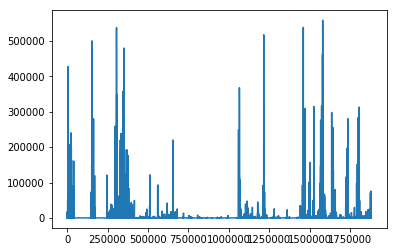

In [46]:
import matplotlib.pyplot as plt

plt.plot(df_small["FIRE_SIZE"]);

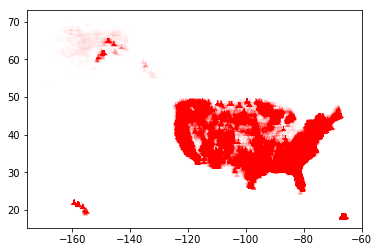

In [44]:
plt.scatter(df_small["LONGITUDE"], df_small["LATITUDE"], alpha=.003, marker="2", color="red")
plt.show()

In [56]:
grass_fire = df_small[df_small["FIRE_NAME"] == "GRASS FIRE"].sort_values(by=["FIRE_YEAR", "DISCOVERY_DOY"])

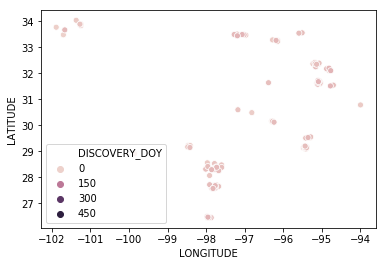

In [65]:
#grass_fire.plot(x='LONGITUDE', y='LATITUDE', style='rx');

import seaborn as sns

gf_09 = grass_fire[(grass_fire["FIRE_YEAR"] == 2009) & (grass_fire["DISCOVERY_DOY"] < 50)]

ax = sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="DISCOVERY_DOY", hue_norm=(1,365), data=gf_09)

In [71]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#  Compute DBSCAN
X = gf_09[['LONGITUDE', 'LATITUDE']]
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
     % metrics.silhouette_score(X, labels))

Estimated number of clusters: 13
Estimated number of noise points: 8
Silhouette Coefficient: 0.688


In [72]:
labels

array([12,  0,  1,  2,  2,  3,  1, 12,  1,  1,  4, -1,  0,  1,  3,  5,  0,
        6,  7,  5, -1,  8,  8,  8, -1,  9, 10,  3, 11,  2,  2, 11,  5,  7,
        1,  3,  9,  8,  8, -1,  3,  0,  8,  8,  0, -1,  6, 10, 10, 10,  0,
        1,  0,  8,  1,  8,  7,  0,  0,  3,  3,  1,  8,  8, -1,  6, -1,  9,
        9,  9,  0,  8,  9,  1,  1,  8,  0, -1,  4,  4, 11,  3,  3,  5,  9,
        8,  3,  9,  7,  3,  1, 11,  6,  9, 11,  8,  4,  6, 12,  3,  3,  9,
        8,  2,  9,  1,  6,  9,  9,  6, 11,  1])

In [73]:
round(45.987234, 2)

45.99

In [76]:
df_small["LAT_ROUND"] = round(df_small["LATITUDE"], 2)
df_small["LON_ROUND"] = round(df_small["LONGITUDE"], 2)

In [109]:
import datetime

fire_year = df_small["FIRE_YEAR"].tolist()
day_of_year = df_small["DISCOVERY_DOY"].tolist()

fire_dates = tuple(zip(fire_year, day_of_year))

def to_date(fire_dates):
    dates = []
    for row in fire_dates:
        dates.append(datetime.datetime(row[0], 1, 1) + datetime.timedelta(row[1] - 1))
    return dates

dates = to_date(fire_dates)

In [110]:
df_small["DATE"] = dates

In [111]:
df_small.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND,LON_ROUND,DATE
0,FOUNTAIN,2005,33,Miscellaneous,0.10,40.036944,-121.005833,40.04,-121.01,2005-02-02
1,PIGEON,2004,133,Lightning,0.25,38.933056,-120.404444,38.93,-120.40,2004-05-12
2,SLACK,2004,152,Debris Burning,0.10,38.984167,-120.735556,38.98,-120.74,2004-05-31
3,DEER,2004,180,Lightning,0.10,38.559167,-119.913333,38.56,-119.91,2004-06-28
4,STEVENOT,2004,180,Lightning,0.10,38.559167,-119.933056,38.56,-119.93,2004-06-28


## Historical MODIS data

In [19]:
past_modis_df = pd.read_csv("fire_archive_M6_66499.csv")
past_modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2


In [20]:
past_modis_df.shape

(1780524, 15)

In [21]:
past_modis_df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

In [22]:
past_modis_df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [78]:
past_modis_df["LAT_ROUND"] = round(past_modis_df["latitude"], 2)
past_modis_df["LON_ROUND"] = round(past_modis_df["longitude"], 2)
past_modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.35,-155.06
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.34,-155.04
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.35,-155.05
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.35,-155.04
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.35,-155.07


In [107]:
past_modis_df["DATE"] = pd.to_datetime(past_modis_df["acq_date"])
past_modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,DATE
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.35,-155.06,2001-01-01
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.34,-155.04,2001-01-01
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.35,-155.05,2001-01-01
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.35,-155.04,2001-01-01
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.35,-155.07,2001-01-01


### Brainstorming steps

- trim down sqlite data to only neccessary columns
- use fire_year and discovery_day to get a date
- translate date into same format as modis data date
- use same number of decimal points for lat/lon between datasets
- join datasets on date/lat/lon
- add column for "reported fires" with true/false
- preprocess data
- use "reported fires" as target and create model

## Merging datasets

In [113]:
merged = pd.merge(past_modis_df, df_small, how='outer', on=['LAT_ROUND', 'LON_ROUND', 'DATE'])
merged.head(20)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,DATE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,311.8,255.8,N,2.0,19.35,-155.06,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.3452,-155.0576,387.8,1.3,1.1,2001-01-01,2100.0,Terra,MODIS,100.0,6.2,320.7,259.8,D,2.0,19.35,-155.06,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849.0,Terra,MODIS,83.0,6.2,296.9,9.8,N,2.0,19.34,-155.04,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,293.6,19.6,N,2.0,19.35,-155.05,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.3454,-155.0469,368.2,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,309.3,110.3,N,2.0,19.35,-155.05,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,303.1,92.9,N,2.0,19.35,-155.04,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849.0,Terra,MODIS,87.0,6.2,291.4,11.8,N,2.0,19.35,-155.07,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,19.3620,-155.0590,371.1,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,307.4,121.8,N,2.0,19.36,-155.06,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19.3552,-155.0552,366.2,1.3,1.1,2001-01-01,2100.0,Terra,MODIS,100.0,6.2,314.8,137.9,D,2.0,19.36,-155.06,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19.3440,-155.0563,403.3,1.0,1.0,2001-01-01,849.0,Terra,MODIS,100.0,6.2,315.8,275.1,N,2.0,19.34,-155.06,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
